# ELE510 Image Processing with robot vision: LAB, Exercise 2, Image Formation.

**Purpose:** *To learn about the image formation process, i.e. how images are projected from the scene to the image plane.*

The theory for this exercise can be found in chapter 2 and 3 of the text book [1]. Supplementary information can found in chapter 1, 2 and 3 in the compendium [2]. See also the following documentations for help:
- [OpenCV](https://docs.opencv.org/4.8.0/d6/d00/tutorial_py_root.html)
- [numpy](https://numpy.org/doc/stable/)
- [matplotlib](https://matplotlib.org/stable/users/index.html)

**IMPORTANT:** Read the text carefully before starting the work. In
many cases it is necessary to do some preparations before you start the work
on the computer. Read necessary theory and answer the theoretical part
frst. The theoretical and experimental part should be solved individually.
The notebook must be approved by the lecturer or his assistant.

**Approval:**
<div class="alert alert-block alert-success">
The current notebook should be submitted on CANVAS as a single pdf file. 
</div>

<div class="alert alert-block alert-info">
    To export the notebook in a pdf format, goes to File -> Download as -> PDF via LaTeX (.pdf).
</div>

**Note regarding the notebook**: The theoretical questions can be answered directly on the notebook using a *Markdown* cell and LaTex commands (if relevant). In alternative, you can attach a scan (or an image) of the answer directly in the cell.

Possible ways to insert an image in the markdown cell:

`![image name]("image_path")`

`<img src="image_path" alt="Alt text" title="Title text" />`


**Under you will find parts of the solution that is already programmed.**

<div class="alert alert-block alert-info">
    <p>You have to fill out code everywhere it is indicated with `...`</p>
    <p>The code section under `######## a)` is answering subproblem a) etc.</p>
</div>


## Problem 1

**a)** What is the meaning of the abbreviation PSF? What does the PSF specify?

PSF stands for **P**oint **S**pread **F**unction. In essence, the PSF describes how much the input value at a given position $(x,y)$ affects the output value at another position $(\alpha, \beta)$.

**b)** Use the imaging model shown in Figure 1. The camera has a lens with focal length $f = 40\text{mm}$ and in the image plane a CCD sensor of size $10\text{mm} \times 10\text{mm}$. The total number of pixels is $5000 \times 5000$. At a distance of $z_w = 0.5\text{m}$ from the camera center, what will be the camera's resolution in pixels per millimeter?

<img src="./images/perspectiveProjection.jpg" alt="Alt text" title="Title text" />

**Figure 1**: Perspective projection caused by a pinhole camera. Figure 2.23 in [2].


CCD sensor size: $10\text{mm} \times 10\text{mm}$ <br>
Total number of pixels: $5000 \times 5000$ <br>
Focal length: $f = 40\text{mm}$ <br>
Distance from camera center: $z_w = 0.5\text{m}$ <br>
$y_w = 1\text{mm}$

**1. Size of a pixel on the CCD sensor**
\begin{align*}
	\text{pixel size} &= \frac{\text{CCD sensor size}}{\text{number of pixels}} \\
	&= \frac{10\text{mm}}{5000} \\
	&= 2\mu\text{m}
\end{align*}

**2. y**
\begin{align*}
	y &= \frac{y_w}{z_w}f \\
	&= \frac{1\text{mm}}{0.5\text{m}}40\text{mm} \\
	&= \frac{1\text{mm}}{0.5 * 1000\text{mm}}40\text{mm} \\
	&= 0.08\text{mm} \\
	&= 80\mu\text{m}
\end{align*}

**3. Camera resolution in pixel per millimeter**
\begin{align*}
	\text{resolution} &= \frac{y}{\text{pixel size}} \\
	&= \frac{80\mu\text{m}}{2\mu\text{m}} \\
	&= 40
\end{align*}

**Answer**
If the camera records an object, one millimeter of that object will be 40 pixels wide in the image.

**c)** Explain how a Bayer filter works. What is the alternative to using this type of filter in image acquisition?

A Bayer filter is a color filter array to capture colors on a cameras sensor. It is a non dense solution to capture colors, where each image channel initially contains missing information. In order to get a full color image, the missing information has to be inferred from the surrounding pixels, e.g. through interpolation.

The alternative to using a Bayer filter or other color filter arrays is to use prisms to split the light into the different wavelengths, and then use a sensor for each wavelength (dense color sensing), e.g. 3CCD.

**d)** Briefly explain the following concepts: Sampling, Quantization, Gamma Compression.

**Sampling** is the process of converting a continuous signal into a discrete signal. In the context of digital imaging, it represents the action of capturing continuous light information at distinct points to produce a digital image. To be more precise, sampling converts the continuous irradiance function into a discrete function defined only over the rectangular lattice of integer $(x, y)$ coordinates.

**Quantization** refers to mapping a continuous range of values to a finite range of discrete values. In the context of digital imaging, it means mapping the continuous range of light intensities to a finite range of discrete values, e.g. 8-bit values.

So if we had a function with continuous domain and continuous value range, as it is with the irradiance function, we can apply **sampling** to transform the function into one with discrete domain  and continuous value range, and afterwards apply **quantization** to transform the function into one with discrete domain and discrete value range.

Our eyes perceive brightness non-linearly, being more sensitive to changes in darker areas than in brighter ones. However, imaging systems capture brightness linearly. **Gamma compression** compensates for this by transforming the linear response of the imaging system to better align with our non-linear perception, ensuring images appear more natural to our eyes.

## Problem 2

Assume we have captured an image with a digital camera. The image covers an area in the scene of size $1.024\text{m} \times 0.768\text{m}$ (The camera has been pointed towards a wall such that the distance is approximately constant over the whole image plane, *weak perspective*). The camera has 4096 pixels horizontally, and 3072 pixels vertically. The active region on the CCD-chip is $8\text{mm} \times 6\text{mm}$. We define the spatial coordinates $(x_w,y_w)$ such that the origin is at the center of the optical axis, x-axis horizontally and y-axis vertically upwards. The image indexes $(x,y)$ is starting in the upper left corner. The solutions to this problem can be found from simple geometric considerations. Make a sketch of the situation and answer the following questions:


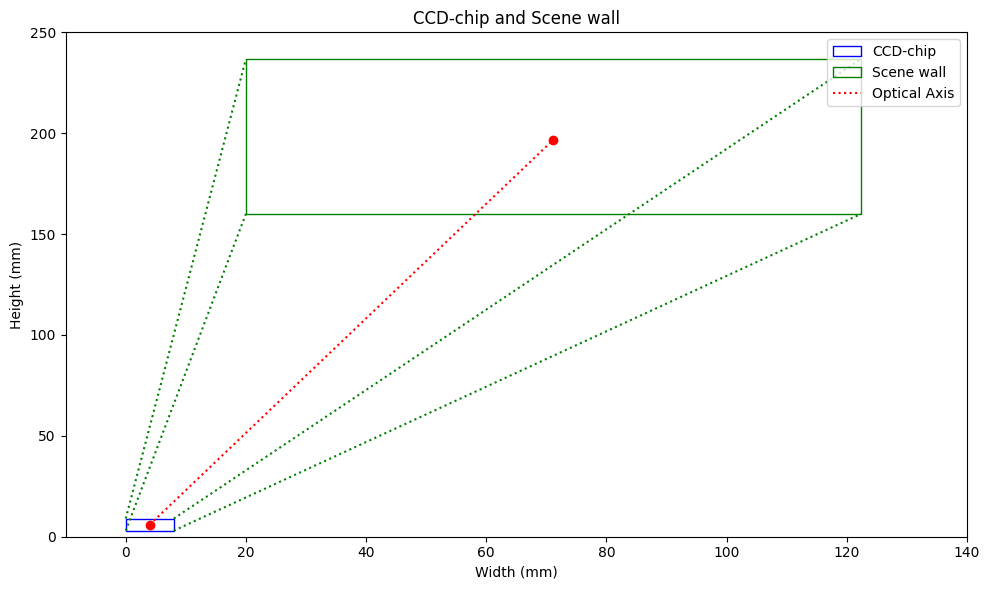

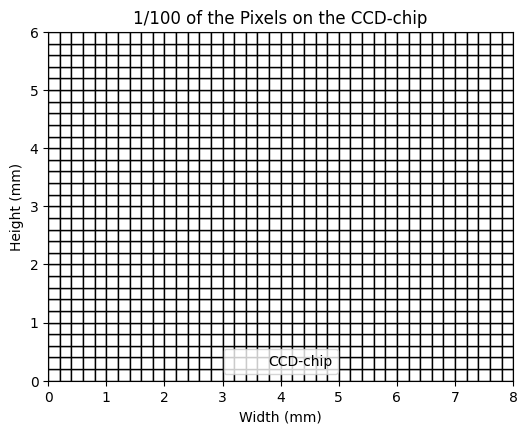

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def draw_scene_and_chip():
    fig, ax = plt.subplots(figsize=(10, 6))

    chip = patches.Rectangle((0, 3), 8, 6, label="CCD-chip", edgecolor='blue', facecolor='none')
    ax.add_patch(chip)

    scene = patches.Rectangle((20, 160), 102.4, 76.8, label="Scene wall", edgecolor='green', facecolor='none')
    ax.add_patch(scene)

    chip_center = (4, 6)
    scene_center = (71.2, 196.8)
    ax.plot(chip_center[0], chip_center[1], 'ro')
    ax.plot(scene_center[0], scene_center[1], 'ro')

    ax.plot([chip_center[0], scene_center[0]], [chip_center[1], scene_center[1]], 'r:', label="Optical Axis")

    chip_corners = [(0,3), (0,9), (8,3), (8,9)]
    scene_corners = [(20,160), (20,236.8), (122.4,160), (122.4,236.8)]

    for i in range(4):
        ax.plot([chip_corners[i][0], scene_corners[i][0]], [chip_corners[i][1], scene_corners[i][1]], 'g:')

    ax.set_xlim(-10, 140)
    ax.set_ylim(0, 250)
    ax.set_xlabel('Width (mm)')
    ax.set_ylabel('Height (mm)')
    ax.legend(loc="upper right")
    plt.title("CCD-chip and Scene wall")
    plt.tight_layout()
    plt.show()

def draw_pixels():
    fig, ax = plt.subplots(figsize=(6, 6))

    chip_width, chip_height = 8, 6  # in mm
    pixel_factor = 100
    n_pixels_x, n_pixels_y = 4096 // pixel_factor, 3072 // pixel_factor
    pixel_width = chip_width / n_pixels_x
    pixel_height = chip_height / n_pixels_y

    ax.add_patch(patches.Rectangle((0, 0), chip_width, chip_height, facecolor="None", label="CCD-chip"))

    for i in range(n_pixels_x):
        for j in range(n_pixels_y):
            ax.add_patch(
                patches.Rectangle(
                    (i * pixel_width, j * pixel_height),
                    pixel_width,
                    pixel_height,
                    facecolor="white",
                    edgecolor="black"
                )
            )

    ax.set_xlim([0, chip_width])
    ax.set_ylim([0, chip_height])
    ax.set_xlabel('Width (mm)')
    ax.set_ylabel('Height (mm)')
    ax.set_title('1/100 of the Pixels on the CCD-chip')
    ax.set_aspect('equal', 'box')
    ax.legend()
    plt.show()

draw_scene_and_chip()
draw_pixels()



**a)** What is the size of each sensor (one pixel) on the CCD-chip?

In [2]:
import numpy as np

# size of the sensor is 8mm x 6mm
sensor_size = np.array([8, 6])

# 4096 x 3072 pixels
sensor_resolution = np.array([4096, 3072])

# pixel size
pixel_size = sensor_size / sensor_resolution

# to micrometers
pixel_size = pixel_size * 1000

print(f"The size of a pixel is {pixel_size[0]} micrometer x {pixel_size[1]} micrometer")

The size of a pixel is 1.953125 micrometer x 1.953125 micrometer


**b)** What is the scaling coefficient between the image plane (CCD-chip) and the scene? What is the scaling coefficient between the scene coordinates and the pixels of the image?

The scene is $1.024m \times 0.768m$, the sensor size is $8mm \times 6mm$.
Thus, we can scale the x-axis by $\frac{1.024m}{8mm}$ and the y-axis by $\frac{0.768m}{6mm}$:

\begin{align*}
x_{scale} &= \frac{1.024m}{8mm} \\
&= \frac{1.024m}{0.008m} \\
&= 128 \\
y_{scale} &= \frac{0.768m}{6mm} \\
&= \frac{0.768m}{0.006m} \\
&= 128
\end{align*}

Thus, the scaling coefficient between the image plane and the scene is $128$ on both axes.



From a) we know that the size of an pixel on the CCD-chip is about $1.95\mu m$ on both axes. Therefore, the scaling coefficient between the scene coordinates and the pixels of the image is equal to first scaling from the scene coordinates to the image plane coordinates, and then from those to the pixels of the image, i.e. $128 \cdot \frac{1}{1.95\mu m}$.


## Problem 3

Translation from the scene to a camera sensor can be done using a transformation matrix, $T$. 

\begin{equation}
	\left[
	\begin{array}{c}x \\ y \\ 1\end{array}\right] = 
	T\left[
	\begin{array}{ccc}
		x_w\\ y_w\\ 1
	\end{array} \right]
\end{equation}

where

\begin{equation}
	T=	\left[
		\begin{array}{ccc}
			\alpha_x & 0 & x_0 \\
			0 & \alpha_y & y_0 \\
			0 & 0 & 1
		\end{array}
		\right]
\end{equation}


$\alpha_x$ and $\alpha_y$ are the scaling factors for their corresponding axes.

Write a function in Python that computes the image points using the transformation matrix, using the parameters from Problem 2. Let the input to the function be a set of $K$ scene points, given by a $2 \times K$ matrix, and the output the resulting image points also given by a $2 \times K$ matrix. The parameters defining the image sensor and field of view from the camera center to the wall can also be given as input parameters.  For simplicity, let the optical axis $(x_0,y_0)$ meet the image plane at the middle point (in pixels).

Test the function for the following input points given as a matrix:
\begin{equation}
    {\mathbf P}_{in} = \left[\begin{array}{ccccccccc} 
    0.512 & -0.512 & -0.512 & 0.512 & 0 & 0.35 & 0.35 & 0.3 & 0.7\\
    0.384 & 0.384 & -0.384 & -0.384 & 0 & 0.15 & -0.15 & -0.5 & 0\end{array}\right]
\end{equation}

<div class="alert alert-block alert-info">
Comment on the results, especially notice the two last points!
</div>


In [3]:
# Import the packages that are useful inside the definition of the weakPerspective function
import numpy as np
from typing import Tuple

In [4]:
"""
Function that takes in input:
- FOV: field of view,
- sensorsize: size of the sensor,
- n_pixels: camera pixels,
- p_scene: K input points (2xK matrix)

and return the resulting image points given the 2xK matrix
"""
def weakPerspective(FOV: Tuple[float, float], sensorsize: Tuple[float, float], n_pixels: Tuple[int, int], p_scene):
    # Extracting from tuples
    FOV_x, FOV_y = FOV
    sensor_x, sensor_y = sensorsize
    n_pixels_x, n_pixels_y = n_pixels
    
    # Calculating scaling factors (basically Question 2 a) + b))
    alpha_x = (n_pixels_x / sensor_x) * (sensor_x / FOV_x)
    alpha_y = (n_pixels_y / sensor_y) * (sensor_y / FOV_y)
    
    # Midpoint in pixels
    x_0 = n_pixels_x // 2
    y_0 = n_pixels_y // 2
    
    # Transformation matrix
    T = np.array([[alpha_x, 0, x_0],
                  [0, alpha_y, y_0],
                  [0,      0,   1]])
    
    # Add row of ones to the points
    p_scene = np.vstack([p_scene, np.ones(p_scene.shape[1])])
    
    # Transforming the points
    p_img = np.dot(T, p_scene)
    
    # Remove row of ones
    p_img = p_img[:2, :]
    
    return p_img

In [5]:
# The above function is then called using the following parameters:

# Parameters
# Take the values from Question 2
FOV = (1.024, 0.768) # i don't think we have enough information to calculate the angular FOV (need focal length), so I'm just using the dimensions of the sensor
sensorsize = (0.008, 0.006)
n_pixels = (4096, 3072)
p_scene_x = [0.512, -0.512, -0.512, 0.512, 0, 0.35, 0.35, 0.3, 0.7]
p_scene_y = [0.384, 0.384, -0.384, -0.384, 0, 0.15, -0.15, -0.5, 0]

In [6]:
####
# This cell is locked; it can be only be executed to see the results. 
####
# Input data:
p_scene = np.array([p_scene_x, p_scene_y])

# Call to the weakPerspective() function 
pimage = weakPerspective(FOV, sensorsize, n_pixels, p_scene)

# Result: 
print(pimage)

[[4096.    0.    0. 4096. 2048. 3448. 3448. 3248. 4848.]
 [3072. 3072.    0.    0. 1536. 2136.  936. -464. 1536.]]


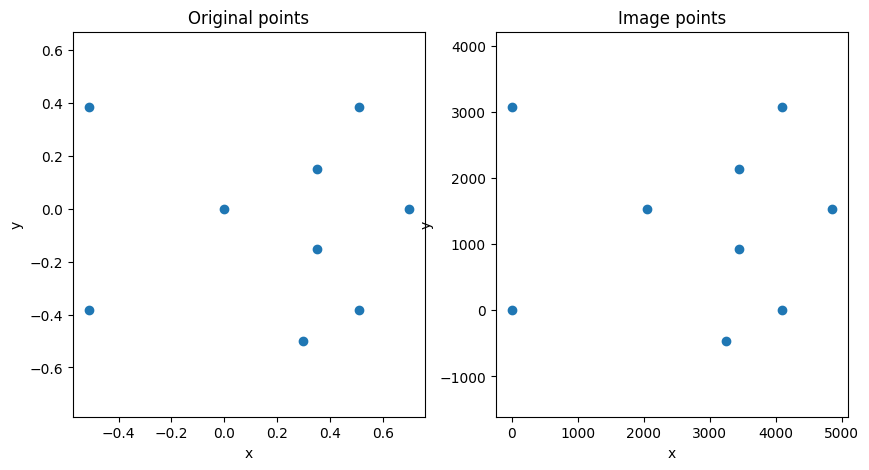

In [7]:
import matplotlib.pyplot as plt

# Plot the original points (in the range of the FOV) and the image points (in the range of the pixels) side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(p_scene[0, :], p_scene[1, :], 'o')
plt.title('Original points')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(1, 2, 2)
plt.plot(pimage[0, :], pimage[1, :], 'o')
plt.title('Image points')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

Plotting the original locations and the corresponding pixel locations on the image side by side, we see that the two sets of points are visually equal (i.e. no distortion or something else has occured), as expected.

Focussing on the ranges of the points, we know since our camera can capture a width (x-axis) of 1.024 meters, it can only capture locations with a scene x-coordinate between -0.512m and 0.512m. In our dataset we have some of those points right on the edge of what our camera can capture, and these points have pixel coordinates on the x axis of 0 and 4096, respectively. This is also as expected. And points not on the edge of what our camera observes, but in between the edges, also have pixel coordinates in between 0 and 4096, as expected. E.g. the point at $x_{sceene} = 0m$ has a pixel coordinate of $x = 2048$.
Similar observations can be made for the y-axis.

Finally, our dataset contains two points outside of the space observable of our camera. Thus, these points should receive pixel coordinates outside of the range $[0,4096]$ for the x-axis and $[0,3072]$ for the y-axis. The second to last point has a y-coordinate of -0.5, thus outside our observable area, and also receives a negative pixel-coordinate on the y-axis. Similarly, the last points x-coordinate is with 0.7 outside of what the camera can capture, and thus our function also assigns it to a pixel with x-value $4848 > 4096$.



### Delivery (dead line) on CANVAS: 12-09-2021 at 23:59


## Contact
### Course teacher
Professor Kjersti Engan, room E-431,
E-mail: kjersti.engan@uis.no

### Teaching assistant
Saul Fuster Navarro, room E-401
E-mail: saul.fusternavarro@uis.no


Jorge Garcia Torres Fernandez, room E-401
E-mail: jorge.garcia-torres@uis.no


## References

[1] S. Birchfeld, Image Processing and Analysis. Cengage Learning, 2016.

[2] I. Austvoll, "Machine/robot vision part I," University of Stavanger, 2018. Compendium, CANVAS.